### Neural Networks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('reduced_var_data.csv', index_col = 0)
y = data['SalePrice']
x = data.drop(labels = 'SalePrice', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

As usual, I will start ** Training on the actual Sale price **

In [4]:
seed = 42
np.random.seed(seed)

n_feat = x.shape[1]
mdl = Sequential()
mdl.add(Dense(units=256, input_dim = n_feat, activation = 'relu'))
mdl.add(Dense(units=1, activation='linear'))

mdl.compile(loss='mean_squared_error', optimizer='adam', metrics= ['mse', 'mae'])
monitor = EarlyStopping(monitor= 'val_loss', min_delta=1e-3, 
                        patience = 10, verbose=1, mode = 'auto')
history = mdl.fit(x_train, y_train, validation_data = (x_test, y_test), 
                  callbacks=[monitor],batch_size= 64,epochs=5000,verbose=0)

y_pred = mdl.predict(x_test)
MSEscore = (mean_squared_error(y_pred, y_test))
print('Score MSE = {}'.format(MSEscore))

MAEscore = (mean_absolute_error(y_pred, y_test))
print('Score MAE = {}'.format(MAEscore))
print('R2_score = {}'.format(r2_score(y_test, y_pred)))
mdl.summary()

Epoch 04090: early stopping
Score MSE = 830356207.3640757
Score MAE = 19768.238566638127
R2_score = 0.8682731094023859
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               8192      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 8,449
Trainable params: 8,449
Non-trainable params: 0
_________________________________________________________________


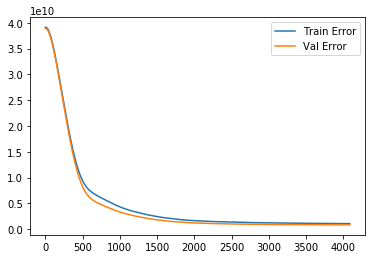

In [5]:
plt.figure()
plt.plot(history.epoch, history.history['mean_squared_error'], label = 'Train Error')
plt.plot(history.epoch, history.history['val_mean_squared_error'], label = 'Val Error')
plt.legend()

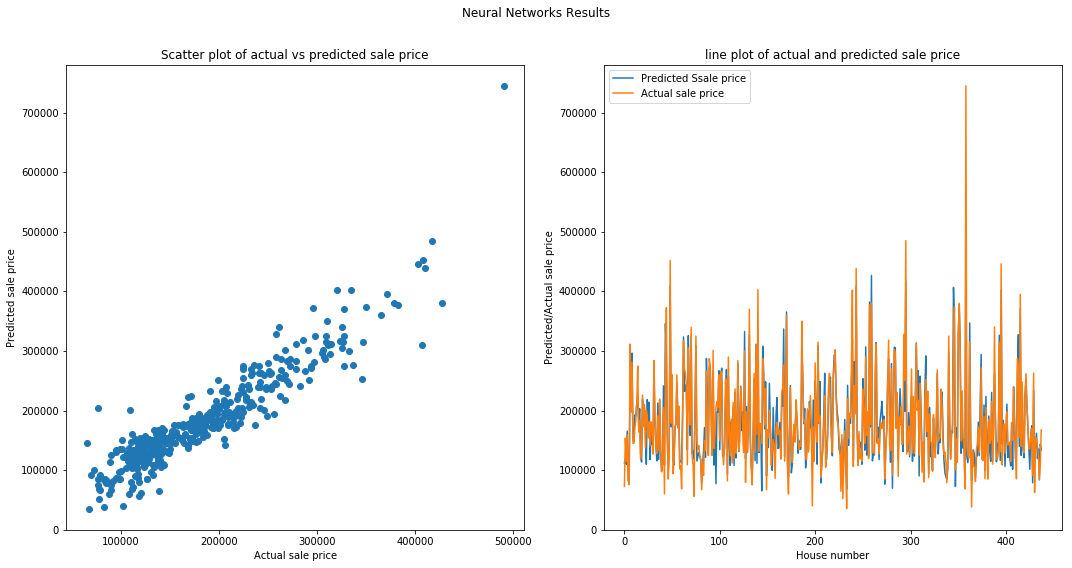

In [6]:
y_pred = mdl.predict(x_test)
fig = plt.figure(figsize=(15,8))
fig.suptitle('Neural Networks Results')
plt.subplot(121)
plt.scatter((y_pred), (y_test))
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Scatter plot of actual vs predicted sale price')
plt.subplot(122)
plt.plot((y_pred), label='Predicted Ssale price')
plt.plot((y_test.values), label='Actual sale price')
plt.xlabel('House number')
plt.ylabel('Predicted/Actual sale price')
plt.title('line plot of actual and predicted sale price')
plt.legend()
plt.tight_layout()
fig.subplots_adjust(top=0.88)

In [7]:
y_test.shape, y_pred.shape

((438,), (438, 1))

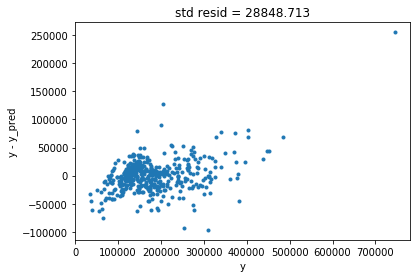

In [8]:
resid = y_test - y_pred.squeeze()
mean_resid = resid.mean()
std_resid = resid.std()
plt.plot(y_test,resid,'.')
plt.xlabel('y')
plt.ylabel('y - y_pred');
plt.title('std resid = {:.3f}'.format(std_resid));

In [9]:
print("Corrolation between true and predicted value using NN on the actual sale price is {}".\
      format(np.corrcoef(y_test,y_pred.squeeze())[0][1]))

Corrolation between true and predicted value using NN on the actual sale price is 0.9318429100771091


## Train on log of the sale price

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, np.log(y), test_size = 0.3, random_state = 42)

ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)


seed = 42
np.random.seed(seed)

n_feat = x.shape[1]
mdl = Sequential()
mdl.add(Dense(units=256, input_dim = n_feat, activation = 'relu'))
mdl.add(Dense(units=256, input_dim = n_feat, activation = 'relu'))
mdl.add(Dense(units=1, activation='linear'))

mdl.compile(loss='mean_squared_error', optimizer='adam', metrics= ['mse', 'mae'])
monitor = EarlyStopping(monitor= 'val_loss', min_delta=1e-3, 
                        patience = 10, verbose=1, mode = 'auto')
history = mdl.fit(x_train, y_train, validation_data = (x_test, y_test), 
                  callbacks=[monitor],batch_size= 64,epochs=5000,verbose=0)

y_pred = mdl.predict(x_test)
MSEscore = (mean_squared_error(np.exp(y_pred), np.exp(y_test)))
print('Score MSE = {}'.format(MSEscore))

MAEscore = (mean_absolute_error(np.exp(y_pred), np.exp(y_test)))
print('Score MAE = {}'.format(MAEscore))

print('R2_score = {}'.format(r2_score(np.exp(y_pred), np.exp(y_test))))
mdl.summary()

Epoch 00151: early stopping
Score MSE = 7890035460598.446
Score MAE = 211136.2905429509
R2_score = 0.00039785770222766637
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               8192      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 74,241
Trainable params: 74,241
Non-trainable params: 0
_________________________________________________________________


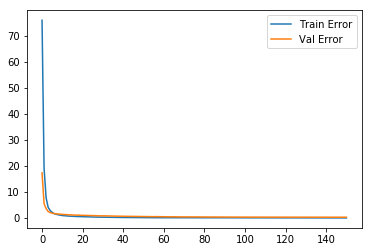

In [23]:
plt.figure()
plt.plot(history.epoch, history.history['mean_squared_error'], label = 'Train Error')
plt.plot(history.epoch, history.history['val_mean_squared_error'], label = 'Val Error')
plt.legend()

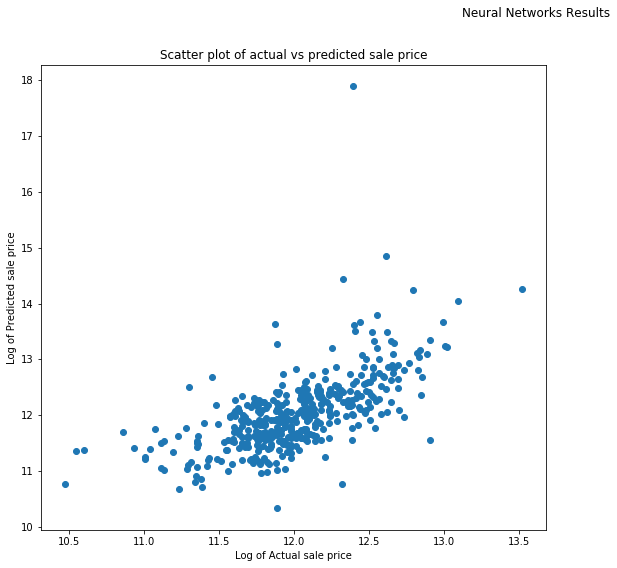

In [31]:
y_pred = mdl.predict(x_test)
fig = plt.figure(figsize=(15,8))
fig.suptitle('Neural Networks Results')
plt.subplot(121)
plt.scatter(y_test, y_pred)
plt.xlabel('Log of Actual sale price')
plt.ylabel('Log of Predicted sale price')
plt.title('Scatter plot of actual vs predicted sale price')


plt.tight_layout()
fig.subplots_adjust(top=0.88)

In [25]:
y_test.shape, y_pred.shape

((438,), (438, 1))

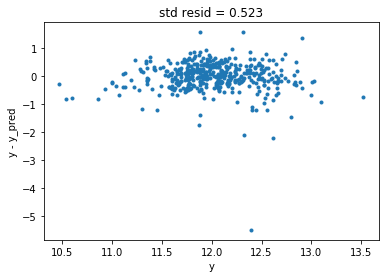

In [26]:
resid = y_test - y_pred.squeeze()
mean_resid = resid.mean()
std_resid = resid.std()
plt.plot(y_test,resid,'.')
plt.xlabel('y')
plt.ylabel('y - y_pred');
plt.title('std resid = {:.3f}'.format(std_resid));

In [27]:
print("Corrolation between true and predicted value using NN on the log of sale price is {}".\
      format(np.corrcoef(y_test,y_pred.squeeze())[0][1]))

Corrolation between true and predicted value using NN on the log of sale price is 0.6404857931600895


Working on the Actual sale price value gives better results than working on the log of sale price

** Neural Neworks gives a bad results compared to SVM. **